In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
data = pd.read_csv("data_ffnn_3classes.txt",header = None,sep=" ")
V_neuron= 3
W_neuron = 3

Erro_History = []

In [80]:
# FRONT PROPAGATION
def YMatrix(data):
    Y = [[],[],[]]
    for y in data:
        if y == 0:
            Y[0].append(1)
            Y[1].append(0)
            Y[2].append(0)
        elif y == 1:
            Y[0].append(0)
            Y[1].append(1)
            Y[2].append(0)
        elif y == 2:
            Y[0].append(0)
            Y[1].append(0)
            Y[2].append(1)
    return np.array(Y).transpose()
            

def X2Matrix(X):
    ones = np.ones(((np.size(X,0)),1))
    return np.append(ones,X,axis=1)

def X3Matrix(X,V):
    return X.dot(V)
    
def FMatrix(X):
    return 1/(1 + np.exp(-X))

def F2Matrix(F):
    ones = np.ones((np.size(F,0),1))
    return np.append(ones,F,axis=1)

def F3Matrix(F,W):
    return F.dot(W)

def GMatrix(F):
    return 1/(1 + np.exp(-F))

def Error(G,Y):
    err = 0
    for i in range(np.size(G,0)):
        for j in range(np.size(G,1)):
            err += (G[i][j] - Y[i][j] ) ** 2
    return err/2

In [81]:
# BACK PROPAGATION
# Weight correction

def W_Correction(G,Y,F,W,a):
    W2 = np.zeros((np.size(W,0),np.size(W,1)))
    for k in range(np.size(W,0)):
        for j in range(np.size(W,1)):
            w = W[k][j]
            err = 0
            for i in range(np.size(G,1)):
                g = G[i][j]
                y = Y[i][j]
                f = F[i][k]
                
                err += (g-y) * g * (1-g) * f
            W2[k][j] = w - (a*err)
    return W2


def v_correction(g_mat, y_mat, f_mat, w_mat, x_mat_ext, v_mat, alpha):
    v_matrix_new = np.zeros((np.size(v_mat, 0),np.size(v_mat, 1)))
    for n in range(np.size(x_mat_ext, 1)):
        for k in range(np.size(v_mat, 1)):
            v = v_mat[n][k]
            err = 0
            for i in range(np.size(g_mat, 0)):
                f = f_mat[i][k]
                x_ext = x_mat_ext[i][n]
                
                for j in range(np.size(g_mat, 1)):
                    g = g_mat[i][j]
                    y = y_mat[i][j]
                    w = w_mat[k][j]
                    err += (g-y) * g * (-g) * w * f * (1-f) * x_ext
            v_matrix_new[n][k] = v - (alpha*err)
    return v_matrix_new

In [82]:
# FFNN
# Learning Loop

def FFNN(X2,Y,G,W,V,F,a,iter = 5000):
    new_v = V
    new_x2 = X2
    new_g = G
    new_w = W
    new_f = F
    i=0
    while i <= iter:
        new_v = v_correction(new_g,Y,new_f,new_w,new_x2,new_v,a)
        
        X3_Mat = X3Matrix(new_x2,new_v)
        
        new_f = FMatrix(X3_Mat)
        F2_Mat = F2Matrix(new_f)
        
        new_w = W_Correction(new_g,Y,F2_Mat,new_w,a*2)
        
        F3_Mat = F3Matrix(F2_Mat,new_w)
        
        new_g = GMatrix(F3_Mat)
        
        err = Error(new_g,Y)
        Erro_History.append(err)
        
        i +=1
    return  new_g

In [83]:
def ShowErrorLog():
    plt.plot(Erro_History)
    plt.ylabel("Error")
    plt.xlabel("Itteration")
    plt.show()

         0       1    2
0   1.9643  4.5957  1.0
1   2.2753  3.8589  1.0
2   2.9781  4.5651  1.0
3   2.9320  3.5519  1.0
4   3.5772  2.8560  1.0
..     ...     ...  ...
66  4.7483  0.7251  2.0
67  4.2916  1.0857  2.0
68  4.7126  0.8640  2.0
69  4.1005  1.0058  2.0
70  3.9601  1.4057  2.0

[71 rows x 3 columns]
[[0.21211622 0.90400832 0.20066503]
 [0.21215802 0.90398108 0.20069444]
 [0.21206616 0.90403709 0.20062349]
 [0.2121194  0.90400381 0.2006617 ]
 [0.21212572 0.90399932 0.20066263]
 [0.21207751 0.90402964 0.20062933]
 [0.21209597 0.9040182  0.20064341]
 [0.21205565 0.90404319 0.20061491]
 [0.21209493 0.90401944 0.20064493]
 [0.21207877 0.9040298  0.2006338 ]
 [0.21207399 0.90403199 0.20062829]
 [0.21215221 0.90398271 0.20068342]
 [0.21218391 0.90396665 0.20071767]
 [0.21210881 0.90401189 0.20065762]
 [0.21215408 0.90398232 0.20068824]
 [0.21206789 0.90403588 0.20062436]
 [0.21206656 0.90403651 0.20062264]
 [0.21207246 0.90403279 0.20062619]
 [0.21210218 0.9040142  0.20064683]
 [0.2

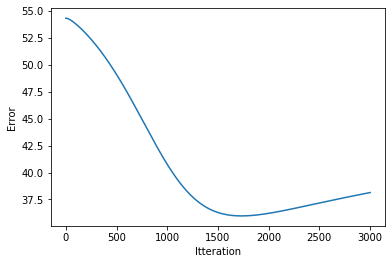

In [84]:
print(data)

Y_Matrix = YMatrix(data[2])
X_Matrix = np.array([data[0],data[1]]).transpose()
X2_Mat = X2Matrix(X_Matrix)

V_Mat = np.random.rand(np.size(X2_Mat,1),V_neuron)

X3_Mat = X3Matrix(X2_Mat,V_Mat)

F_Mat = FMatrix(X3_Mat)
F2_Mat = F2Matrix(F_Mat)

W_Mat = np.random.rand(V_neuron+1,W_neuron)

F3_Mat = F3Matrix(F2_Mat,W_Mat)

G_Mat = GMatrix(F3_Mat)

E_Mat = Error(G_Mat,Y_Matrix)

Erro_History.append(E_Mat)

Result = FFNN(X2_Mat,Y_Matrix,G_Mat,W_Mat,V_Mat,F_Mat,0.0005,iter=3000)
ShowErrorLog()
print(Result)